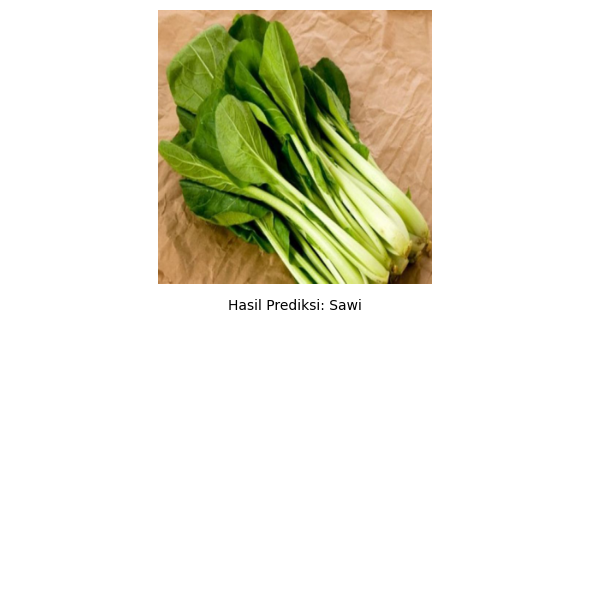

In [10]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Men Load file tflite
model_path = '/content/ModelFinalBangkit.tflite'  # file tflite yang digunakan
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# mendapatkan intput dan output detail
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# melakukan preprocessing pada gambar
image_path = '/content/ssas.jpg'  #  gambar yang akan digunakan sebagai prediksi
image = Image.open(image_path)
image = image.resize((input_details[0]['shape'][1], input_details[0]['shape'][2]))  # melakukan resize pada gambar sesuai dengan input pada model tflite
image = np.expand_dims(image, axis=0)  # menambahkan batch dimension
image = image.astype(np.float32)  # melakukan convert gambar ke float32
image /= 255.0  # Normalisasi gambar

# men-set input sensor
interpreter.set_tensor(input_details[0]['index'], image)

# menjalankan inference
interpreter.invoke()

# mendapatkan output prediksi
output = interpreter.get_tensor(output_details[3]['index'])

# men load label kategori
category_labels = '/content/labelmap (1).txt'
with open(category_labels, 'r') as f:
    labels = f.read().splitlines()

# mendapatkan prediksi
predicted_category = labels[np.argmax(output)]

# men-set subplot untuk menampilkan gambar dan prediksi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# menampilkan gambar
ax1.imshow(image[0])
ax1.axis('off')

# menampilkan tulisan hasil prediksi
ax2.text(0.5, 1.0, f'Hasil Prediksi: {predicted_category}', fontsize=10, ha='center', va='center')
ax2.axis('off')

# menyesuaikan jarak antar subplot
plt.tight_layout()

# menampilkan plot
plt.show()


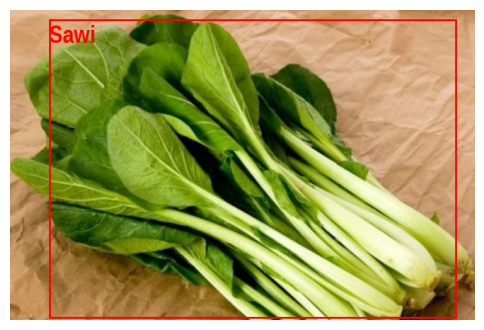

In [21]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.font_manager

# men-load tflite file
model_path = '/content/ModelFinalBangkit.tflite'  # tflite file used
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# mendapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# # melakukan preprocessing pada gambar
image_path = '/content/ssas.jpg'
original_image = Image.open(image_path)
original_image = original_image.convert('RGB')  # memastikan bahwa gambar berformat RGB
image = original_image.resize((input_details[0]['shape'][1], input_details[0]['shape'][2]))  # melakukan resize pada gambar sesuai dengan input pada model tflite
image_np = np.expand_dims(image, axis=0)  # menambahkan batch dimension
image_np = image_np.astype(np.float32)  # melakukan convert gambar ke float32
image_np /= 255.0  # Normalisasi gambar

# men-set input sensor
interpreter.set_tensor(input_details[0]['index'], image_np)

# menjalankan inference
interpreter.invoke()

# mengambil bounding boxes
boxes = interpreter.get_tensor(output_details[1]['index'])

# mengambil kelas
classes = interpreter.get_tensor(output_details[3]['index'])

# mendapatkan nilai prediksi
scores = interpreter.get_tensor(output_details[0]['index'])

# menload kategori label
category_labels = '/content/labelmap (1).txt'
with open(category_labels, 'r') as f:
    labels = f.read().splitlines()

# menset ukuran teks label
font_path = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')[0]
font = ImageFont.truetype(font_path, size=40)

# menset image draw
draw = ImageDraw.Draw(original_image)

# men-set threshold untuk batasan nilai confidence prediksi
threshold = 0.5

# mengiterasi bounding boxes
for i in range(boxes.shape[1]):
    if scores[0, i] > threshold:  # filter dengan score
        ymin, xmin, ymax, xmax = boxes[0, i]
        (left, right, top, bottom) = (xmin * original_image.width, xmax * original_image.width,
                                      ymin * original_image.height, ymax * original_image.height)

        # menggambar bounding box
        draw.rectangle([left, top, right, bottom], outline='red', width=3)

        # menggambar label
        draw.text((left, top), labels[int(classes[0, i])], fill='red', font= font)

# men-set subplot
fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))

# menampilkan gambar
ax1.imshow(original_image)
ax1.axis('off')

# menampilkan plot
plt.show()
